# TP4 Ciencia de Datos- Giacobelli & Strejilevich, Franciscos



### Cargamos la base de datos

In [190]:
import pandas as pd

from pandas import DataFrame as df
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Ejercicio 2

In [191]:
ind_24 = pd.read_excel(r"C:\Users\fstrejilevich\Desktop\TP4\usu_individual_T124.xlsx")
ind_04 = pd.read_stata(r"C:\Users\fstrejilevich\Desktop\TP4\Individual_t104.dta")
hogar_24 = pd.read_excel(r"C:\Users\fstrejilevich\Desktop\TP4\usu_hogar_T124.xlsx")
hogar_04 = pd.read_stata(r"C:\Users\fstrejilevich\Desktop\TP4\Hogar_t104.dta")

### Revisamos las columnas: 

In [192]:
#Miro las columnas que tenemos
hogar_04.columns

Index(['CODUSU', 'nro_hogar', 'realizada', 'ano4', 'trimestre', 'region',
       'mas_500', 'aglomerado', 'pondera', 'iv1', 'iv1_esp', 'iv2', 'iv3',
       'iv3_esp', 'iv4', 'iv5', 'iv6', 'iv7', 'iv7_esp', 'iv8', 'iv9', 'iv10',
       'iv11', 'iv12_1', 'iv12_2', 'iv12_3', 'ii1', 'ii2', 'ii3', 'ii3_1',
       'ii4_1', 'ii4_2', 'ii4_3', 'ii5', 'ii5_1', 'ii6', 'ii6_1', 'ii7',
       'ii7_esp', 'ii8', 'ii8_esp', 'ii9', 'v1', 'v2', 'v21', 'v22', 'v3',
       'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14',
       'v15', 'v16', 'v17', 'v18', 'v19_a', 'v19_b', 'IX_Tot', 'IX_Men10',
       'IX_Mayeq10', 'itf', 'decifr', 'idecifr', 'rdecifr', 'gdecifr',
       'pdecifr', 'adecifr', 'ipcf', 'deccfr', 'ideccfr', 'rdeccfr', 'gdeccfr',
       'pdeccfr', 'adeccfr', 'vii1_1', 'vii1_2', 'vii2_1', 'vii2_2', 'vii2_3',
       'vii2_4', 'idimph'],
      dtype='object')

In [193]:
hogar_24.columns

Index(['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'REALIZADA', 'REGION',
       'MAS_500', 'AGLOMERADO', 'PONDERA', 'IV1', 'IV1_ESP', 'IV2', 'IV3',
       'IV3_ESP', 'IV4', 'IV5', 'IV6', 'IV7', 'IV7_ESP', 'IV8', 'IV9', 'IV10',
       'IV11', 'IV12_1', 'IV12_2', 'IV12_3', 'II1', 'II2', 'II3', 'II3_1',
       'II4_1', 'II4_2', 'II4_3', 'II5', 'II5_1', 'II6', 'II6_1', 'II7',
       'II7_ESP', 'II8', 'II8_ESP', 'II9', 'V1', 'V2', 'V21', 'V22', 'V3',
       'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14',
       'V15', 'V16', 'V17', 'V18', 'V19_A', 'V19_B', 'IX_TOT', 'IX_MEN10',
       'IX_MAYEQ10', 'ITF', 'DECIFR', 'IDECIFR', 'RDECIFR', 'GDECIFR',
       'PDECIFR', 'ADECIFR', 'IPCF', 'DECCFR', 'IDECCFR', 'RDECCFR', 'GDECCFR',
       'PDECCFR', 'ADECCFR', 'PONDIH', 'VII1_1', 'VII1_2', 'VII2_1', 'VII2_2',
       'VII2_3', 'VII2_4'],
      dtype='object')

In [194]:
#Pasamos todas las columnas a mayusculas para que queden iguales despues en el merge
# Cambiamos los nombres de las columnas a mayúsculas
hogar_04.columns = hogar_04.columns.str.upper()
hogar_24.columns = hogar_24.columns.str.upper()
ind_04.columns = ind_04.columns.str.upper()
ind_24.columns = ind_24.columns.str.upper()

### Eliminen todas las observaciones que no corresponden a los aglomerados de Ciudad Autónoma de Buenos Aires o Gran Buenos Aires y unan ambos trimestres en una sola base.

###### Asegúrese de estar usando las variables CODUSU y NRO_Hogar para el merge.

In [195]:
# Armo un diccionario de mapeo para estandarizar los nombres
aglomerado_04 = {'Ciudad de Buenos Aires': 'CABA', 'Partidos del GBA': 'GBA'}
aglomerado_24 = {32: 'CABA', 33: 'GBA'}

# Ahora a filtramos y transformamos los datos individuales
ind_04_filtrado = ind_04.query("AGLOMERADO in @aglomerado_04.keys()").copy()
ind_04_filtrado['AGLOMERADO'] = ind_04_filtrado['AGLOMERADO'].map(aglomerado_04)

ind_24_filtrado = ind_24.query("AGLOMERADO in @aglomerado_24.keys()").copy()
ind_24_filtrado['AGLOMERADO'] = ind_24_filtrado['AGLOMERADO'].map(aglomerado_24)

# Lo mismo peor con los datos de hogares
hogar_04_filtrado = hogar_04.query("AGLOMERADO in @aglomerado_04.keys()").copy()
hogar_04_filtrado['AGLOMERADO'] = hogar_04_filtrado['AGLOMERADO'].map(aglomerado_04)

hogar_24_filtrado = hogar_24.query("AGLOMERADO in @aglomerado_24.keys()").copy()
hogar_24_filtrado['AGLOMERADO'] = hogar_24_filtrado['AGLOMERADO'].map(aglomerado_24)

# Post filtrados verificamos las dimensiones de cada uno que limpiamos
for df_name, df in zip(
    ["ind_04_filtrado", "ind_24_filtrado", "hogar_04_filtrado", "hogar_24_filtrado"],
    [ind_04_filtrado, ind_24_filtrado, hogar_04_filtrado, hogar_24_filtrado]
): 
    print(f"Datos en {df_name}: {df.shape}")
print(hogar_04_filtrado['AGLOMERADO'].value_counts())
print(ind_04_filtrado['AGLOMERADO'].value_counts())
print(hogar_24_filtrado['AGLOMERADO'].value_counts())
print(ind_24_filtrado['AGLOMERADO'].value_counts())

Datos en ind_04_filtrado: (7647, 176)
Datos en ind_24_filtrado: (7051, 177)
Datos en hogar_04_filtrado: (2351, 88)
Datos en hogar_24_filtrado: (2545, 88)
AGLOMERADO
GBA     1663
CABA     688
Name: count, dtype: int64
AGLOMERADO
GBA     5811
CABA    1836
Name: count, dtype: int64
AGLOMERADO
GBA     1881
CABA     664
Name: count, dtype: int64
AGLOMERADO
GBA     5629
CABA    1422
Name: count, dtype: int64


In [196]:

print(ind_04_filtrado['CODUSU'].value_counts)

<bound method IndexOpsMixin.value_counts of 0       125098  
1       125397  
2       125515  
3       125558  
4       125558  
          ...   
7642    288171  
7643    288405  
7644    288405  
7645    288405  
7646    288405  
Name: CODUSU, Length: 7647, dtype: object>


In [197]:
# Listas de nombres y DataFrames a procesar
datasets = {
    "ind_04_filtrado": ind_04_filtrado,
    "ind_24_filtrado": ind_24_filtrado,
    "hogar_04_filtrado": hogar_04_filtrado,
    "hogar_24_filtrado": hogar_24_filtrado
}

# Ajustamos el formato de las claves CODUSU y NRO_HOGAR
datasets = {name: df.assign(
    CODUSU=df['CODUSU'].astype(str),  # Convertimos CODUSU a string
    NRO_HOGAR=df['NRO_HOGAR'].astype(int)  # Convertimos NRO_HOGAR a entero
) for name, df in datasets.items()}

# Verificar valores nulos y mostrar resultados
for name, df in datasets.items():
    print(f"Valores nulos en {name}:")
    print(df[['CODUSU', 'NRO_HOGAR']].isnull().sum())


Valores nulos en ind_04_filtrado:
CODUSU       0
NRO_HOGAR    0
dtype: int64
Valores nulos en ind_24_filtrado:
CODUSU       0
NRO_HOGAR    0
dtype: int64
Valores nulos en hogar_04_filtrado:
CODUSU       0
NRO_HOGAR    0
dtype: int64
Valores nulos en hogar_24_filtrado:
CODUSU       0
NRO_HOGAR    0
dtype: int64


In [198]:
data_2004 = ind_04_filtrado.merge(hogar_04_filtrado, on=['CODUSU', 'NRO_HOGAR'], how='inner')
print(data_2004['CODUSU'].value_counts())

CODUSU
219747      15
157368      14
134291      13
204642      13
136127      12
            ..
218565       1
207544       1
207177       1
207130       1
125098       1
Name: count, Length: 2329, dtype: int64


Fran, acá arriba lo que hice fue asegurarme de que las columnas claves CODUSU y NRO_HOGAR estén en el formato correcto antes de seguir codeando. Convertí CODUSU a texto, porque es un identificador único, y pasé NRO_HOGAR a números enteros porque tiene más sentido usarlo como número para cálculos o filtros. Para organizarme mejor, puse todos los DataFrames (como ind_04_filtrado y hogar_04_filtrado) en un diccionario que me permite recorrerlos de manera más facil y mantener el código limpio.

Hice esto porque quiero evitar errores al unir las bases más adelante. Además, usé el método assign para ajustar las columnas de cada DataFrame en una sola línea, además verifiqué si había valores nulos en estas claves (isnull().sum()), porque si aparecen, pueden complicar los merges creo yo, si pasa eso habría que decidir cómo manejarlos. Si queres cambiar algo obvio anda manejandolo

### Merge de las bases de datos

In [199]:
# Merge para 2004
data_2004 = ind_04_filtrado.merge(hogar_04_filtrado, on=['CODUSU', 'NRO_HOGAR'], how='inner')
data_2004['ano'] = 2004

# Merge para 2024
data_2024 = ind_24_filtrado.merge(hogar_24_filtrado, on=['CODUSU', 'NRO_HOGAR'], how='inner')
data_2024['ano'] = 2024

# Verificar dimensiones y columnas
print("Datos combinados para 2004:", data_2004.shape)
print("Datos combinados para 2024:", data_2024.shape)

Datos combinados para 2004: (7647, 263)
Datos combinados para 2024: (7051, 264)


In [200]:
print(data_2004['CODUSU'].value_counts())

CODUSU
219747      15
157368      14
134291      13
204642      13
136127      12
            ..
218565       1
207544       1
207177       1
207130       1
125098       1
Name: count, Length: 2329, dtype: int64


In [201]:
print(data_2024['CODUSU'].value_counts())

CODUSU
TQRMNORYYHLNMQCDEIJAH00855538    12
TQRMNOQUSHJOPQCDEIJAH00793462    12
TQRMNOTPSHJNSOCDEIJAH00794201    11
TQRMNOQTVHLMMMCDEIJAH00855297    11
TQRMNOQPRHJOONCDEIJAH00860538    10
                                 ..
TQRMNOQSRHLNONCDEIIAD00854777     1
TQRMNOQXXHMMQLCDEIJAH00802449     1
TQRMNOSSYHKMQNCDEIJAH00859642     1
TQRMNOSRTHJMSLCDEIJAH00797047     1
TQRMNORXWHKKNQCDEIIAD00858564     1
Name: count, Length: 2540, dtype: int64


In [202]:


# Mostrar el DataFrame o sus columnas
print(data_2024.columns)

Index(['CODUSU', 'ANO4_x', 'TRIMESTRE_x', 'NRO_HOGAR', 'COMPONENTE', 'H15',
       'REGION_x', 'MAS_500_x', 'AGLOMERADO_x', 'PONDERA_x',
       ...
       'PDECCFR_y', 'ADECCFR_y', 'PONDIH_y', 'VII1_1', 'VII1_2', 'VII2_1',
       'VII2_2', 'VII2_3', 'VII2_4', 'ano'],
      dtype='object', length=264)


In [203]:
data_2004['ESTADO'].value_counts()

ESTADO
Ocupado                                                         3079
Inactivo                                                        2800
Menor de 10 años                                                1230
Desocupado                                                       528
Entrevista individual no realizada (no respuesta al cuestion      10
Name: count, dtype: int64

### Punto 3- Limpieza de datos

In [205]:
    
# Aplicar la función a los datos por año
data_2004 = data_2004.dropna(subset=['CODUSU', 'NRO_HOGAR', 'CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED','IV1','IX_TOT','IV3','IV6','II7','V8','V9','V10','V11'])
data_2024 = data_2024.dropna(subset=['CODUSU', 'NRO_HOGAR', 'CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED','IV1','IX_TOT','IV3','IV6','II7','V8','V9','V10','V11'])

In [206]:
data_2004['ESTADO'].value_counts()

ESTADO
Ocupado                                                         3079
Inactivo                                                        2800
Menor de 10 años                                                1230
Desocupado                                                       528
Entrevista individual no realizada (no respuesta al cuestion      10
Name: count, dtype: int64

In [207]:
data_2024['ESTADO'].value_counts()

ESTADO
1    3224
3    2662
4     813
2     311
0      41
Name: count, dtype: int64

In [208]:
data_2004['ESTADO'].value_counts()

ESTADO
Ocupado                                                         3079
Inactivo                                                        2800
Menor de 10 años                                                1230
Desocupado                                                       528
Entrevista individual no realizada (no respuesta al cuestion      10
Name: count, dtype: int64

In [209]:
data_2024['ESTADO'].value_counts()

ESTADO
1    3224
3    2662
4     813
2     311
0      41
Name: count, dtype: int64

##### Basicamente limpie datos con lo que dijo nacho y algunos otros criterios, en principio elimine columnas que toman respuestas de lo que respondieron en otra variable, como las categorías de ingreso (DECCFR, IDECCFR, etc.) que derivan del ingreso per cápita (IPCF). También saqué variables redundantes de ubicación como REGION y MAS_500, ya que AGLOMERADO ya las engloba. Además, descarté detalles menos útiles del hogar (VII1_1, VII2_1, etc.) que no aportan valor directo al análisis, y ponderaciones como PONDERA que no vamos a usar ahora. En resumen, me enfoqué en quedarme solo con las columnas que son relevantes para las siguientes etapas del análisis."

# Punto 4- Formar 3 variables que me puedan predecir la desocupación

### Variable 1- Edad promedio hogar

In [210]:
# Aseguramos que la columna CH06 (edad) sea numérica
data_2004['CH06'] = pd.to_numeric(data_2004['CH06'], errors='coerce')
data_2024['CH06'] = pd.to_numeric(data_2024['CH06'], errors='coerce')

# Calcular edad promedio por hogar
data_2004['EDAD_PROMEDIO_HOGAR'] = data_2004.groupby(['CODUSU', 'NRO_HOGAR'])['CH06'].transform('mean')
data_2024['EDAD_PROMEDIO_HOGAR'] = data_2024.groupby(['CODUSU', 'NRO_HOGAR'])['CH06'].transform('mean')

# Verificar
print("\nEdad promedio por hogar (2004):")
print(data_2004[['CODUSU', 'NRO_HOGAR', 'EDAD_PROMEDIO_HOGAR']].head())
print("\nEdad promedio por hogar (2024):")
print(data_2024[['CODUSU', 'NRO_HOGAR', 'EDAD_PROMEDIO_HOGAR']].head())



Edad promedio por hogar (2004):
     CODUSU  NRO_HOGAR  EDAD_PROMEDIO_HOGAR
0  125098          1.0                 79.0
1  125397          1.0                 67.0
2  125515          1.0                 74.0
3  125558          1.0                 37.5
4  125558          1.0                 37.5

Edad promedio por hogar (2024):
                          CODUSU  NRO_HOGAR  EDAD_PROMEDIO_HOGAR
0  TQRMNOSUWHLKMUCDEIJAH00855260          1                 67.0
1  TQRMNOSUWHLKMUCDEIJAH00855260          1                 67.0
2  TQRMNOSUWHLKMUCDEIJAH00855260          1                 67.0
3  TQSMNORWVHLLKQCDEIJAH00856914          1                 26.0
4  TQRMNOPQQHLOLRCDEIJAH00855133          1                 88.0


### Variable 2- Mapeo el nivel educativo y lo convierto a numeros

In [211]:
# Convertir nivel educativo a valores numéricos
niveles_educativos = {
    'Sin instrucción': 0,
    'Primaria Incompleta': 1,
    'Primaria Completa': 2,
    'Secundaria Incompleta': 3,
    'Secundaria Completa': 4,
    'Superior Universitaria Incompleta': 5,
    'Superior Universitaria Completa': 6,
    'Ns./Nr.': None  # Manejar como NaN
}

data_2004['NIVEL_ED_NUM'] = data_2004['NIVEL_ED'].replace(niveles_educativos)
data_2024['NIVEL_ED_NUM'] = data_2024['NIVEL_ED'].replace(niveles_educativos)

# Verificar
print("\nNivel educativo como numérico (2004):")
print(data_2004[['CODUSU', 'NRO_HOGAR', 'NIVEL_ED_NUM']].head())
print("\nNivel educativo como numérico (2024):")
print(data_2024[['CODUSU', 'NRO_HOGAR', 'NIVEL_ED_NUM']].head())




Nivel educativo como numérico (2004):
     CODUSU  NRO_HOGAR NIVEL_ED_NUM
0  125098          1.0            3
1  125397          1.0            2
2  125515          1.0            2
3  125558          1.0            2
4  125558          1.0            6

Nivel educativo como numérico (2024):
                          CODUSU  NRO_HOGAR  NIVEL_ED_NUM
0  TQRMNOSUWHLKMUCDEIJAH00855260          1             2
1  TQRMNOSUWHLKMUCDEIJAH00855260          1             6
2  TQRMNOSUWHLKMUCDEIJAH00855260          1             6
3  TQSMNORWVHLLKQCDEIJAH00856914          1             6
4  TQRMNOPQQHLOLRCDEIJAH00855133          1             1


C:\Users\fstrejilevich\AppData\Local\Temp\2\ipykernel_12776\1977070717.py:13: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data_2004['NIVEL_ED_NUM'] = data_2004['NIVEL_ED'].replace(niveles_educativos)


### Variable 3- Proporcion de personas con educación superior por hogar 

###### Se relaciona con la anterior, pueden pensarse como una, pero sirven para analisis diferentes

In [212]:
# Calcular proporción de personas con educación superior por hogar
data_2004['PROP_EDUC_SUPERIOR'] = data_2004.groupby(['CODUSU', 'NRO_HOGAR'])['NIVEL_ED_NUM'].transform(
    lambda x: (x >= 5).sum() / len(x)
)
data_2024['PROP_EDUC_SUPERIOR'] = data_2024.groupby(['CODUSU', 'NRO_HOGAR'])['NIVEL_ED_NUM'].transform(
    lambda x: (x >= 5).sum() / len(x)
)

# Verificar
print("\nProporción de personas con educación superior (2004):")
print(data_2004[['CODUSU', 'NRO_HOGAR', 'PROP_EDUC_SUPERIOR']].head())
print("\nProporción de personas con educación superior (2024):")
print(data_2024[['CODUSU', 'NRO_HOGAR', 'PROP_EDUC_SUPERIOR']].head())



Proporción de personas con educación superior (2004):
     CODUSU  NRO_HOGAR  PROP_EDUC_SUPERIOR
0  125098          1.0                0.00
1  125397          1.0                0.00
2  125515          1.0                0.00
3  125558          1.0                0.75
4  125558          1.0                0.75

Proporción de personas con educación superior (2024):
                          CODUSU  NRO_HOGAR  PROP_EDUC_SUPERIOR
0  TQRMNOSUWHLKMUCDEIJAH00855260          1            0.666667
1  TQRMNOSUWHLKMUCDEIJAH00855260          1            0.666667
2  TQRMNOSUWHLKMUCDEIJAH00855260          1            0.666667
3  TQSMNORWVHLLKQCDEIJAH00856914          1            1.000000
4  TQRMNOPQQHLOLRCDEIJAH00855133          1            0.000000


### Variable 4- Estado civil como numerica

In [213]:
# Convertir estado civil a números
estado_civil = {
    'Unido': 1, 'Casado': 2, 'Separado o divorciado': 3, 'Viudo': 4, 'Soltero': 5
}

data_2004['ESTADO_CIVIL_NUM'] = data_2004['CH07'].replace(estado_civil)
data_2024['ESTADO_CIVIL_NUM'] = data_2024['CH07'].replace(estado_civil)

# Verificar
print("\nEstado civil como numérico (2004):")
print(data_2004[['CODUSU', 'NRO_HOGAR', 'ESTADO_CIVIL_NUM']].head())
print("\nEstado civil como numérico (2024):")
print(data_2024[['CODUSU', 'NRO_HOGAR', 'ESTADO_CIVIL_NUM']].head())



Estado civil como numérico (2004):
     CODUSU  NRO_HOGAR ESTADO_CIVIL_NUM
0  125098          1.0                4
1  125397          1.0                3
2  125515          1.0                4
3  125558          1.0                2
4  125558          1.0                2

Estado civil como numérico (2024):
                          CODUSU  NRO_HOGAR  ESTADO_CIVIL_NUM
0  TQRMNOSUWHLKMUCDEIJAH00855260          1                 4
1  TQRMNOSUWHLKMUCDEIJAH00855260          1                 2
2  TQRMNOSUWHLKMUCDEIJAH00855260          1                 2
3  TQSMNORWVHLLKQCDEIJAH00856914          1                 5
4  TQRMNOPQQHLOLRCDEIJAH00855133          1                 4


C:\Users\fstrejilevich\AppData\Local\Temp\2\ipykernel_12776\3861162831.py:6: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data_2004['ESTADO_CIVIL_NUM'] = data_2004['CH07'].replace(estado_civil)


### Variable 5- Tiene pareja (Casado o Unido)

###### Pasa algo similar al anteiror pueden pensarse como una, pero pasarla a numerica permite ver muchos analisis en el punto 5

In [214]:
# Crear columna binaria indicando si la persona tiene pareja (1: Unido, 2: Casado)
data_2004['TIENE_PAREJA'] = data_2004['ESTADO_CIVIL_NUM'].apply(lambda x: 1 if x in [1, 2] else 0)
data_2024['TIENE_PAREJA'] = data_2024['ESTADO_CIVIL_NUM'].apply(lambda x: 1 if x in [1, 2] else 0)

# Verificar
print("\nIndicador de pareja (2004):")
print(data_2004[['CODUSU', 'NRO_HOGAR', 'TIENE_PAREJA']].head())

print("\nIndicador de pareja (2024):")
print(data_2024[['CODUSU', 'NRO_HOGAR', 'TIENE_PAREJA']].head())


Indicador de pareja (2004):
     CODUSU  NRO_HOGAR  TIENE_PAREJA
0  125098          1.0             0
1  125397          1.0             0
2  125515          1.0             0
3  125558          1.0             1
4  125558          1.0             1

Indicador de pareja (2024):
                          CODUSU  NRO_HOGAR  TIENE_PAREJA
0  TQRMNOSUWHLKMUCDEIJAH00855260          1             0
1  TQRMNOSUWHLKMUCDEIJAH00855260          1             1
2  TQRMNOSUWHLKMUCDEIJAH00855260          1             1
3  TQSMNORWVHLLKQCDEIJAH00856914          1             0
4  TQRMNOPQQHLOLRCDEIJAH00855133          1             0


### Veo como van quedando las columnas

In [215]:
# Verificar las columnas creadas en el Punto 4
nuevas_columnas = ['CODUSU', 'NRO_HOGAR', 'EDAD_PROMEDIO_HOGAR', 'NIVEL_ED_NUM', 
                   'PROP_EDUC_SUPERIOR', 'ESTADO_CIVIL_NUM', 'TIENE_PAREJA']

print("\nNuevas columnas en data_2004:")
print(data_2004[nuevas_columnas].head())

print("\nNuevas columnas en data_2024:")
print(data_2024[nuevas_columnas].head())


Nuevas columnas en data_2004:
     CODUSU  NRO_HOGAR  EDAD_PROMEDIO_HOGAR NIVEL_ED_NUM  PROP_EDUC_SUPERIOR  \
0  125098          1.0                 79.0            3                0.00   
1  125397          1.0                 67.0            2                0.00   
2  125515          1.0                 74.0            2                0.00   
3  125558          1.0                 37.5            2                0.75   
4  125558          1.0                 37.5            6                0.75   

  ESTADO_CIVIL_NUM  TIENE_PAREJA  
0                4             0  
1                3             0  
2                4             0  
3                2             1  
4                2             1  

Nuevas columnas en data_2024:
                          CODUSU  NRO_HOGAR  EDAD_PROMEDIO_HOGAR  \
0  TQRMNOSUWHLKMUCDEIJAH00855260          1                 67.0   
1  TQRMNOSUWHLKMUCDEIJAH00855260          1                 67.0   
2  TQRMNOSUWHLKMUCDEIJAH00855260          1

# Punto 5- Estadísticas descriptivas de tres variables

In [216]:
# Variables a describir
variables_a_describir = ['EDAD_PROMEDIO_HOGAR', 'PROP_EDUC_SUPERIOR', 
                         'ESTADO_CIVIL_NUM', 'TIENE_PAREJA']

print("\nEstadísticas descriptivas (2004):")
print(data_2004[variables_a_describir].describe())

print("\nEstadísticas descriptivas (2024):")
print(data_2024[variables_a_describir].describe())


Estadísticas descriptivas (2004):
       EDAD_PROMEDIO_HOGAR  PROP_EDUC_SUPERIOR  TIENE_PAREJA
count           7647.00000         7647.000000   7647.000000
mean              34.03929            0.281548      0.417549
std               16.91129            0.298382      0.493187
min                9.00000            0.000000      0.000000
25%               21.50000            0.000000      0.000000
50%               28.80000            0.250000      0.000000
75%               41.50000            0.500000      1.000000
max               96.00000            1.000000      1.000000

Estadísticas descriptivas (2024):
       EDAD_PROMEDIO_HOGAR  PROP_EDUC_SUPERIOR  ESTADO_CIVIL_NUM  TIENE_PAREJA
count          7051.000000         7051.000000       7051.000000   7051.000000
mean             37.870940            0.342079          3.443483      0.397674
std              17.422699            0.345266          1.670615      0.489452
min              10.000000            0.000000          1.000000 

### Distribución de ESTADO_CIVIL

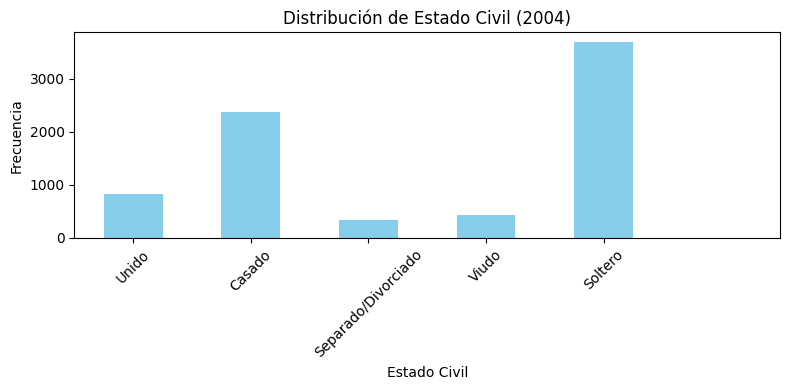

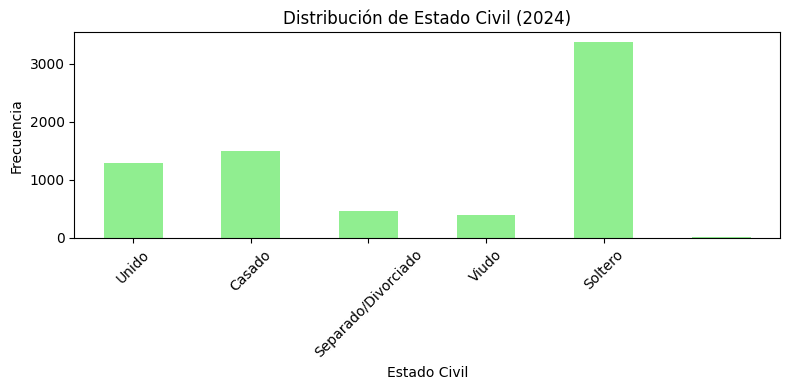

In [217]:
# Distribución del estado civil
estado_civil_frecuencia_2004 = data_2004['ESTADO_CIVIL_NUM'].value_counts().sort_index()
estado_civil_frecuencia_2024 = data_2024['ESTADO_CIVIL_NUM'].value_counts().sort_index()

estado_civil_labels = ['Unido', 'Casado', 'Separado/Divorciado', 'Viudo', 'Soltero']

# Gráfico para 2004
plt.figure(figsize=(8, 4))
estado_civil_frecuencia_2004.plot(kind='bar', color='skyblue')
plt.title('Distribución de Estado Civil (2004)')
plt.xlabel('Estado Civil')
plt.ylabel('Frecuencia')
plt.xticks(ticks=range(len(estado_civil_labels)), labels=estado_civil_labels, rotation=45)
plt.tight_layout()
plt.show()

# Gráfico para 2024
plt.figure(figsize=(8, 4))
estado_civil_frecuencia_2024.plot(kind='bar', color='lightgreen')
plt.title('Distribución de Estado Civil (2024)')
plt.xlabel('Estado Civil')
plt.ylabel('Frecuencia')
plt.xticks(ticks=range(len(estado_civil_labels)), labels=estado_civil_labels, rotation=45)
plt.tight_layout()
plt.show()

### Proporción de personas en pareja

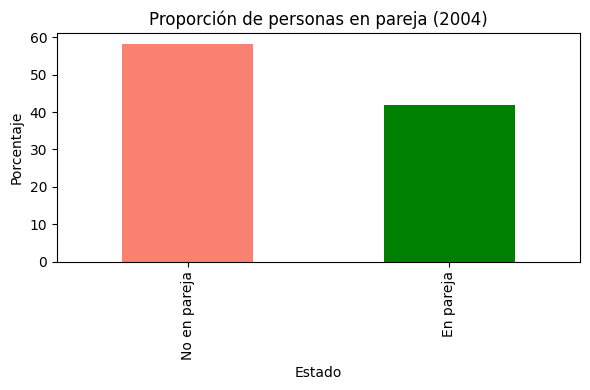

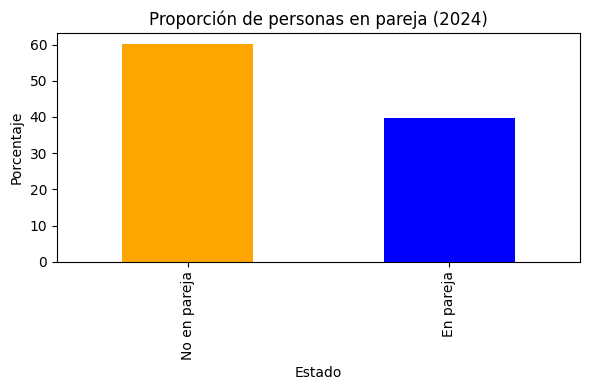

In [218]:
# Aseguramos que ambas frecuencias incluyan todas las categorías esperadas
pareja_frecuencia_2004 = data_2004['TIENE_PAREJA'].value_counts(normalize=True).reindex([0, 1], fill_value=0) * 100
pareja_frecuencia_2024 = data_2024['TIENE_PAREJA'].value_counts(normalize=True).reindex([0, 1], fill_value=0) * 100

# Asignamos etiquetas a los índices
pareja_frecuencia_2004.index = ['No en pareja', 'En pareja']
pareja_frecuencia_2024.index = ['No en pareja', 'En pareja']

# Gráfico para 2004
plt.figure(figsize=(6, 4))
pareja_frecuencia_2004.plot(kind='bar', color=['salmon', 'green'])
plt.title('Proporción de personas en pareja (2004)')
plt.ylabel('Porcentaje')
plt.xlabel('Estado')
plt.tight_layout()
plt.show()

# Gráfico para 2024
plt.figure(figsize=(6, 4))
pareja_frecuencia_2024.plot(kind='bar', color=['orange', 'blue'])
plt.title('Proporción de personas en pareja (2024)')
plt.ylabel('Porcentaje')
plt.xlabel('Estado')
plt.tight_layout()
plt.show()

### Relación entre TIENE_PAREJA y EDAD_PROMEDIO_HOGAR 

C:\Users\fstrejilevich\AppData\Local\Temp\2\ipykernel_12776\439388197.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_2004, x='TIENE_PAREJA', y='EDAD_PROMEDIO_HOGAR', palette='pastel')


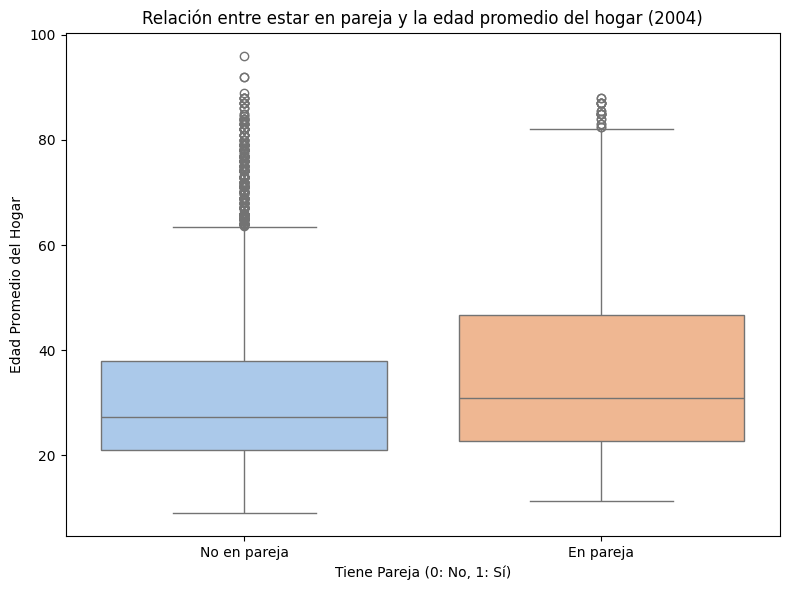

C:\Users\fstrejilevich\AppData\Local\Temp\2\ipykernel_12776\439388197.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_2024, x='TIENE_PAREJA', y='EDAD_PROMEDIO_HOGAR', palette='coolwarm')


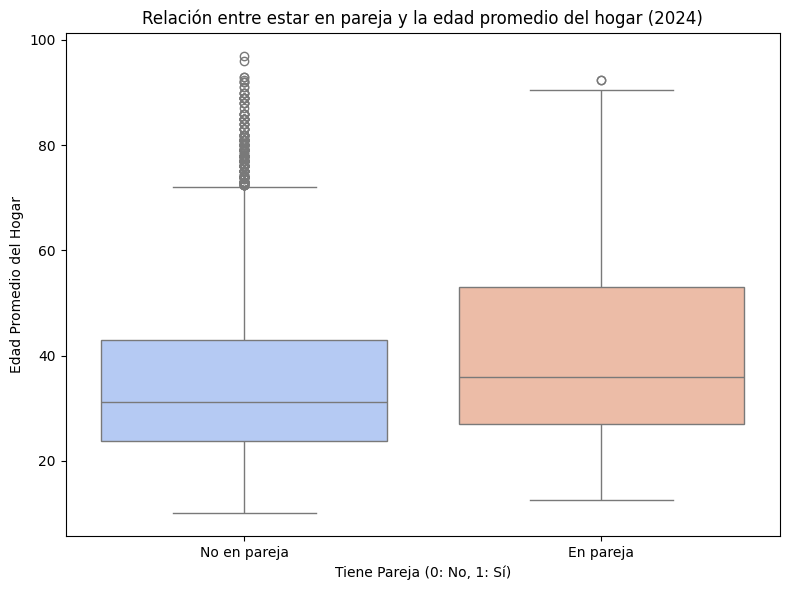

In [219]:
# Boxplot para relación entre "TIENE_PAREJA" y "EDAD_PROMEDIO_HOGAR"
plt.figure(figsize=(8, 6))
sns.boxplot(data=data_2004, x='TIENE_PAREJA', y='EDAD_PROMEDIO_HOGAR', palette='pastel')
plt.title('Relación entre estar en pareja y la edad promedio del hogar (2004)')
plt.ylabel('Edad Promedio del Hogar')
plt.xlabel('Tiene Pareja (0: No, 1: Sí)')
plt.xticks([0, 1], ['No en pareja', 'En pareja'])
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=data_2024, x='TIENE_PAREJA', y='EDAD_PROMEDIO_HOGAR', palette='coolwarm')
plt.title('Relación entre estar en pareja y la edad promedio del hogar (2024)')
plt.ylabel('Edad Promedio del Hogar')
plt.xlabel('Tiene Pareja (0: No, 1: Sí)')
plt.xticks([0, 1], ['No en pareja', 'En pareja'])
plt.tight_layout()
plt.show()

### Distribucion de estado civil en nivel de educación superior

C:\Users\fstrejilevich\AppData\Local\Temp\2\ipykernel_12776\3548369373.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prom_educ_superior_estado_2004 = filtered_2004.groupby('ESTADO_CIVIL_NUM')['PROP_EDUC_SUPERIOR'].mean()
C:\Users\fstrejilevich\AppData\Local\Temp\2\ipykernel_12776\3548369373.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


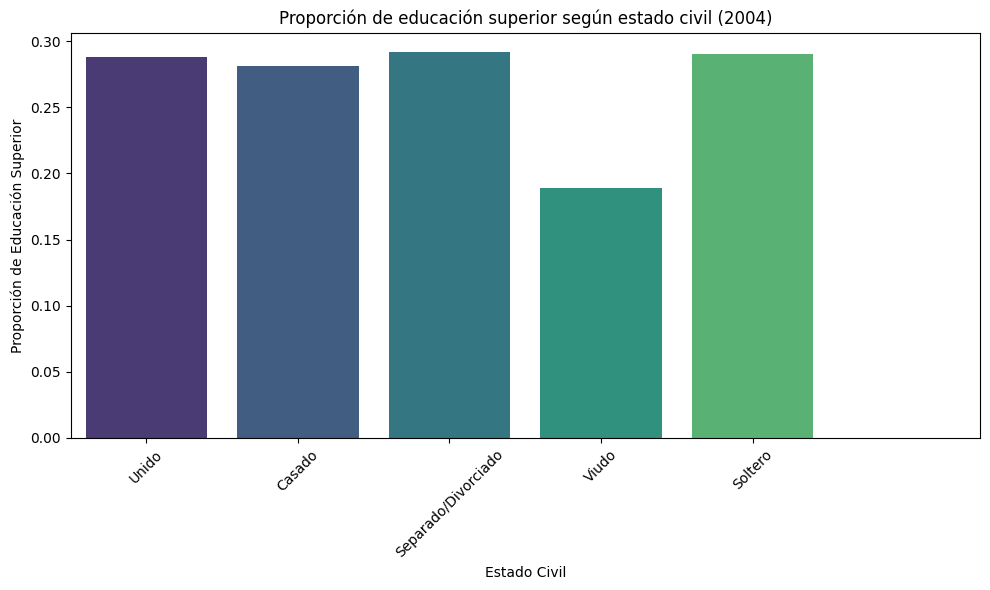

C:\Users\fstrejilevich\AppData\Local\Temp\2\ipykernel_12776\3548369373.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


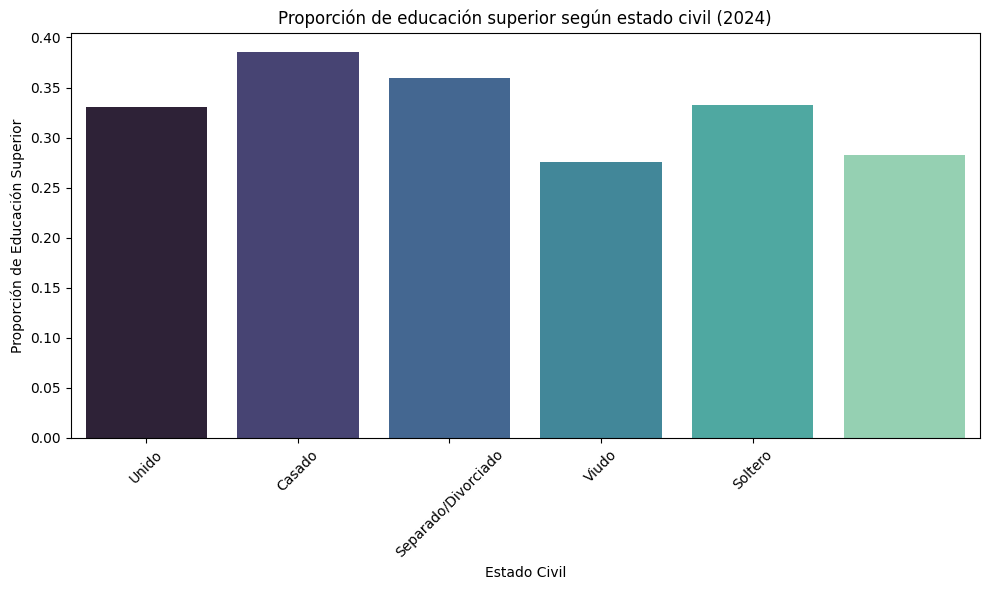

In [220]:
# Proporción de educación superior según estado civil
filtered_2004 = data_2004.dropna(subset=['PROP_EDUC_SUPERIOR', 'ESTADO_CIVIL_NUM'])
filtered_2024 = data_2024.dropna(subset=['PROP_EDUC_SUPERIOR', 'ESTADO_CIVIL_NUM'])

prom_educ_superior_estado_2004 = filtered_2004.groupby('ESTADO_CIVIL_NUM')['PROP_EDUC_SUPERIOR'].mean()
prom_educ_superior_estado_2024 = filtered_2024.groupby('ESTADO_CIVIL_NUM')['PROP_EDUC_SUPERIOR'].mean()

# Gráfico para 2004
plt.figure(figsize=(10, 6))
sns.barplot(
    x=prom_educ_superior_estado_2004.index,
    y=prom_educ_superior_estado_2004.values,
    palette='viridis'
)
plt.title('Proporción de educación superior según estado civil (2004)')
plt.ylabel('Proporción de Educación Superior')
plt.xlabel('Estado Civil')
plt.xticks(ticks=range(5), labels=estado_civil_labels, rotation=45)
plt.tight_layout()
plt.show()

# Gráfico para 2024
plt.figure(figsize=(10, 6))
sns.barplot(
    x=prom_educ_superior_estado_2024.index,
    y=prom_educ_superior_estado_2024.values,
    palette='mako'
)
plt.title('Proporción de educación superior según estado civil (2024)')
plt.ylabel('Proporción de Educación Superior')
plt.xlabel('Estado Civil')
plt.xticks(ticks=range(5), labels=estado_civil_labels, rotation=45)
plt.tight_layout()
plt.show()

### Histograma de distribución de niveles de educación

C:\Users\fstrejilevich\AppData\Local\Temp\2\ipykernel_12776\814168600.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


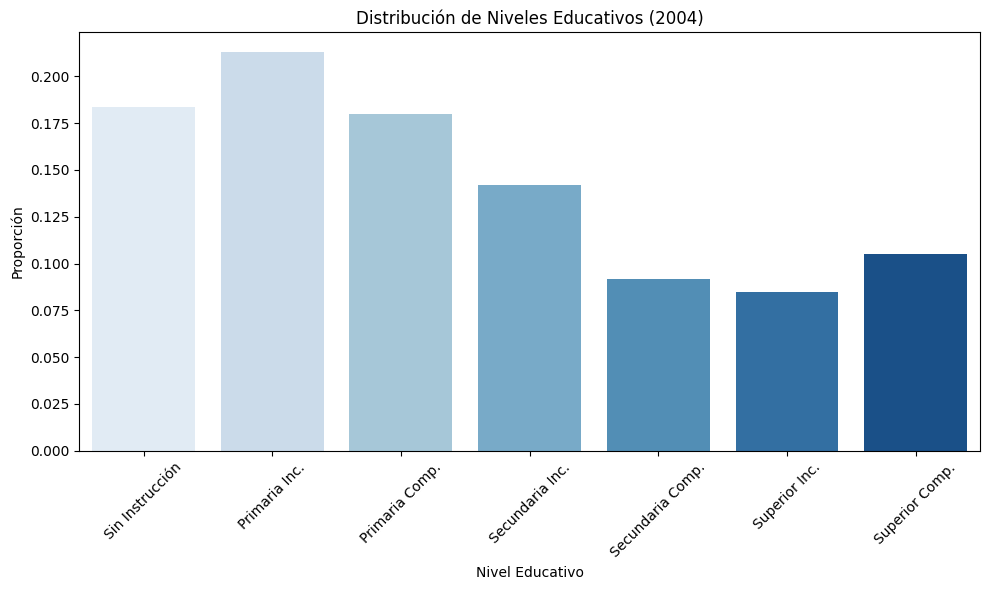

C:\Users\fstrejilevich\AppData\Local\Temp\2\ipykernel_12776\814168600.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


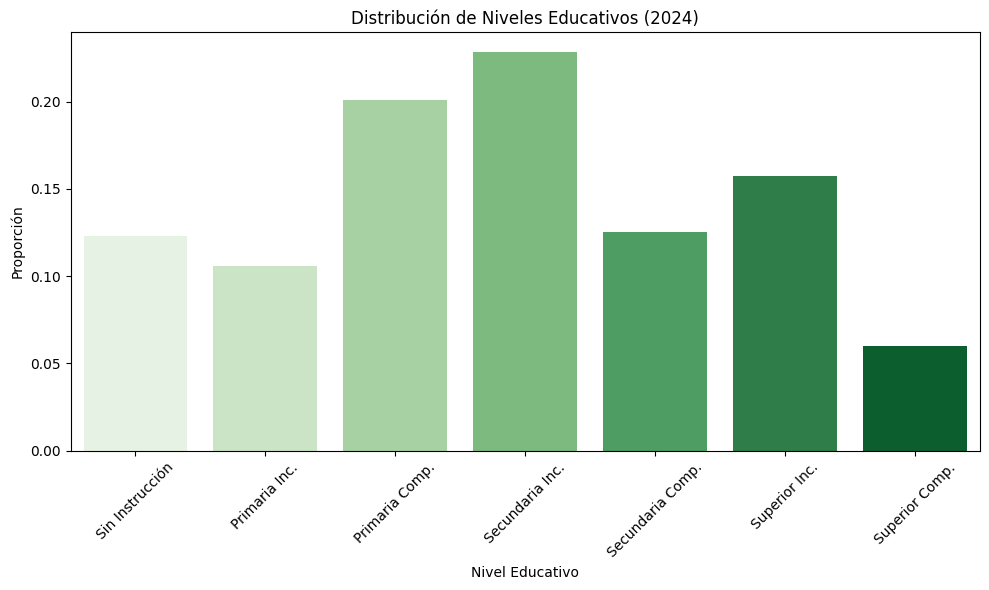

In [221]:
# Filtrar los datos para evitar NaN en las columnas
filtered_2004 = data_2004.dropna(subset=['NIVEL_ED_NUM'])
filtered_2024 = data_2024.dropna(subset=['NIVEL_ED_NUM'])

# Calcular la distribución de niveles educativos (frecuencia) por cada año
nivel_educativo_2004 = filtered_2004['NIVEL_ED_NUM'].value_counts(normalize=True).sort_index()
nivel_educativo_2024 = filtered_2024['NIVEL_ED_NUM'].value_counts(normalize=True).sort_index()

# Etiquetas de los niveles educativos
niveles_labels = ['Sin Instrucción', 'Primaria Inc.', 'Primaria Comp.',
                  'Secundaria Inc.', 'Secundaria Comp.', 'Superior Inc.', 'Superior Comp.']

# Gráfico para 2004
plt.figure(figsize=(10, 6))
sns.barplot(
    x=nivel_educativo_2004.index,
    y=nivel_educativo_2004.values,
    palette='Blues'
)
plt.title('Distribución de Niveles Educativos (2004)')
plt.ylabel('Proporción')
plt.xlabel('Nivel Educativo')
plt.xticks(ticks=range(7), labels=niveles_labels, rotation=45)
plt.tight_layout()
plt.show()

# Gráfico para 2024
plt.figure(figsize=(10, 6))
sns.barplot(
    x=nivel_educativo_2024.index,
    y=nivel_educativo_2024.values,
    palette='Greens'
)
plt.title('Distribución de Niveles Educativos (2024)')
plt.ylabel('Proporción')
plt.xlabel('Nivel Educativo')
plt.xticks(ticks=range(7), labels=niveles_labels, rotation=45)
plt.tight_layout()
plt.show()



# PARTE II

1) Para cada año, partan la base respondieron en una base de prueba y una
de entrenamiento (X_train, y_train, X_test, y_test) utilizando
el comando train_test_split. La base de entrenamiento debe
comprender el 70% de los datos, y la semilla a utilizar (random state
instance) debe ser 101. Establezca a desocupado como su variable
dependiente en la base de entrenamiento (vector y). El resto de las
variables serán las variables independientes (matriz X). Recuerden
agregar la columna de unos (1).


In [222]:
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np


In [223]:
data_2004['ESTADO'].value_counts()

respondieron2004=data_2004[data_2004['ESTADO']!='Entrevista individual no realizada (no respuesta al cuestion']
norespondieron2004=data_2004[data_2004['ESTADO']=='Entrevista individual no realizada (no respuesta al cuestion']
print(respondieron2004['ESTADO'].value_counts())

ESTADO
Ocupado                                                         3079
Inactivo                                                        2800
Menor de 10 años                                                1230
Desocupado                                                       528
Entrevista individual no realizada (no respuesta al cuestion       0
Name: count, dtype: int64


In [224]:
data_2024['ESTADO'].value_counts()

respondieron2024=data_2024[data_2024['ESTADO']!=0]
norespondieron2004=data_2024[data_2024['ESTADO']==0]
print(respondieron2024['ESTADO'].value_counts())

ESTADO
1    3224
3    2662
4     813
2     311
Name: count, dtype: int64


In [225]:
respondieron2024['desocupado'] = respondieron2024['ESTADO'].apply(lambda x: 1 if x == 2 else 0)
print(respondieron2024['desocupado'].value_counts())

desocupado
0    6699
1     311
Name: count, dtype: int64


C:\Users\fstrejilevich\AppData\Local\Temp\2\ipykernel_12776\842966869.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron2024['desocupado'] = respondieron2024['ESTADO'].apply(lambda x: 1 if x == 2 else 0)


In [226]:
respondieron2004['desocupado'] = respondieron2004['ESTADO'].apply(lambda x: 1 if x == 'Desocupado' else 0)
print(respondieron2004['desocupado'].value_counts())

desocupado
0    7109
1     528
Name: count, dtype: int64


C:\Users\fstrejilevich\AppData\Local\Temp\2\ipykernel_12776\2627509188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron2004['desocupado'] = respondieron2004['ESTADO'].apply(lambda x: 1 if x == 'Desocupado' else 0)


In [227]:
respondieron2024=respondieron2024[['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED','IV1','IX_TOT','IV3','IV6','EDAD_PROMEDIO_HOGAR','PROP_EDUC_SUPERIOR','TIENE_PAREJA','desocupado','II7','V8','V9','V10','V11']]
respondieron2004=respondieron2004[['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED','IV1','IX_TOT','IV3','IV6','EDAD_PROMEDIO_HOGAR','PROP_EDUC_SUPERIOR','TIENE_PAREJA','desocupado','II7','V8','V9','V10','V11']]
respondieron2004['Unos']=1
respondieron2024['Unos']=1

In [228]:
conteo_na = respondieron2024.isna().sum()
print(conteo_na)
respondieron2024 = respondieron2024.dropna()

CH04                   0
CH06                   0
CH07                   0
CH08                   0
NIVEL_ED               0
IV1                    0
IX_TOT                 0
IV3                    0
IV6                    0
EDAD_PROMEDIO_HOGAR    0
PROP_EDUC_SUPERIOR     0
TIENE_PAREJA           0
desocupado             0
II7                    0
V8                     0
V9                     0
V10                    0
V11                    0
Unos                   0
dtype: int64


In [230]:
conteo_na = respondieron2004.isna().sum()
print(conteo_na)
respondieron2004=respondieron2004.dropna()

CH04                     0
CH06                   135
CH07                     0
CH08                     0
NIVEL_ED                 0
IV1                      0
IX_TOT                   0
IV3                      0
IV6                      0
EDAD_PROMEDIO_HOGAR      0
PROP_EDUC_SUPERIOR       0
TIENE_PAREJA             0
desocupado               0
II7                      0
V8                       0
V9                       0
V10                      0
V11                      0
Unos                     0
dtype: int64


In [231]:
numeric_columns = ['EDAD_PROMEDIO_HOGAR','IX_TOT','CH06']

# Contar los valores menores o iguales a 0 en cada columna numérica
count_negative_values_per_column = (respondieron2004[numeric_columns] <= 0).sum()

# Ver el resultado
print(count_negative_values_per_column)

EDAD_PROMEDIO_HOGAR    0
IX_TOT                 0
CH06                   0
dtype: int64


In [232]:
numeric_columns = ['EDAD_PROMEDIO_HOGAR','IX_TOT','CH06']

# Contar los valores menores o iguales a 0 en cada columna numérica
count_negative_values_per_column = (respondieron2024[numeric_columns] <= 0).sum()

# Ver el resultado
print(count_negative_values_per_column)

EDAD_PROMEDIO_HOGAR     0
IX_TOT                  0
CH06                   51
dtype: int64


In [233]:
#Se dropean valores negativos
respondieron2024 = respondieron2024[respondieron2024['CH06'] > 0]

In [234]:
#separación de variables en respondieron y no respondieron
y2004=respondieron2004['desocupado']
y2024=respondieron2024['desocupado']
x2004=respondieron2004.drop(columns=['desocupado'])
x2024=respondieron2024.drop(columns=['desocupado'])

In [235]:
#Se busca usando la base 2004 para conseguir las categoricas
columnas_categoricas = x2004.select_dtypes(include='category').columns
print("Columnas categóricas:", columnas_categoricas.tolist())

Columnas categóricas: ['CH04', 'CH07', 'CH08', 'NIVEL_ED', 'IV1', 'IV3', 'IV6', 'II7', 'V8', 'V9', 'V10', 'V11']


In [236]:
#dummys
columnas_categoricas =['CH04', 'CH07', 'CH08', 'NIVEL_ED', 'IV1', 'IV3', 'IV6','II7','V8','V9','V10','V11'] 
x2004=pd.get_dummies(x2004, columns=columnas_categoricas, drop_first=True)
x2024=pd.get_dummies(x2024, columns=columnas_categoricas, drop_first=True)

In [237]:
xtrain2024, xtest2024, ytrain2024, ytest2024 = train_test_split(x2024, y2024, test_size=0.3, random_state=101)
xtrain2004, xtest2004, ytrain2004, ytest2004 = train_test_split(x2004, y2004, test_size=0.3, random_state=101)

2. Expliquen brevemente cómo elegirían λ por validación cruzada (en
Python es alpha). Detallen por qué no usarían el conjunto de prueba
(test) para su elección.

Básicamente, el modelo de cross validation permite elegir el alpha correcto, es decir, cual es el alpha que resulta mejor para el modelo. No se usan los tests por el simple hecho de que tienene exactamente esa función, probar si el modelo realmente funciona. Si se usa los valores de test, se termina moldeando el modelo a esos datos, por ende va a ser muy efectivo para esos valores y esos datos (mucho sesgo) pero cualquier dato que no sea utilizado va a tener problemas de overfitting

3. En validación cruzada, ¿cuáles son las implicancias de usar un k muy
pequeño o uno muy grande? Cuando k = n (con n el número de
muestras), ¿cuántas veces se estima el modelo?

Define cuantas veces va a ser dividida la muestra y por ende cuantas veces va a ser evaluada. En terminos de código, mientras k sea mas grande mas va a tardar el proceso en terminar, por ejemplo puede pasar de tardar 30 segundos a media hora en corrrer todo, solo porque k=2 o 20.

en terminos evaluativos: con un k mas grande se evalua con una mayor cantidad de datos, pero va a ser menos preciso mientras que un k mas chico se va a estimar el modelo con mas datos mientras que la evaluacion va a ser mas sensible a valores particulares

cuando k = n entonces evalua la cantidad de muestras que hay dentro del modelo menos 1


4) Para regresión logística, implementen la penalidad, L1 como la de
LASSO y L2 como la de Ridge con λ = 1 (como en la Tutorial 10), usando
la opción penalty y reporten la matriz de confusión, la curva ROC, los
valores de AUC y de Accuracy para cada año.1 ¿Cómo cambiaron los
resultados con respecto al TP3? ¿La performance de regresión logística
con regularización es mejor o peor?


In [238]:
from sklearn.preprocessing import StandardScaler

# Instancia del escalador
sc = StandardScaler()
columnas_numéricas = ['PROP_EDUC_SUPERIOR','EDAD_PROMEDIO_HOGAR','IX_TOT','CH06','PROP_EDUC_SUPERIOR']
xtrain2024[columnas_numéricas] = sc.fit_transform(xtrain2024[columnas_numéricas])
xtrain2004[columnas_numéricas] = sc.fit_transform(xtrain2004[columnas_numéricas])

In [239]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

# Regresión logística con L1 (LASSO)
modelo_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
modelo_l1.fit(xtrain2024, ytrain2024)

# Regresión logística con L2 (Ridge)
modelo_l2 = LogisticRegression(penalty='l2', solver='liblinear', C=1.0)
modelo_l2.fit(xtrain2024, ytrain2024)

LogisticRegression(solver='liblinear')

Evaluación del modelo Logístico 2024 LASSO:
Accuracy: 0.95
Matriz de Confusión:
[[1988    0]
 [ 100    0]]


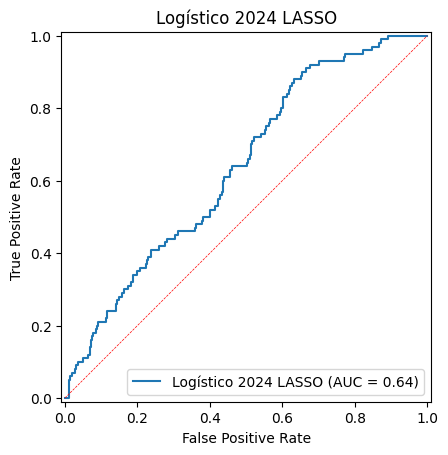

In [240]:
# Evaluación del modelo Logístico 2024 lasso
y_pred_log2024 = modelo_l1.predict(xtest2024)
y_pred_prob2024 = modelo_l1.predict_proba(xtest2024)[:, 1]
accuracy_log2024 = accuracy_score(ytest2024, y_pred_log2024)
conf_matrix_log2024 = confusion_matrix(ytest2024, y_pred_log2024)
fpr_log2024, tpr_log2024, _ = roc_curve(ytest2024, y_pred_prob2024)
roc_auc_log2024 = roc_auc_score(ytest2024, y_pred_prob2024)

print("Evaluación del modelo Logístico 2024 LASSO:")
print(f'Accuracy: {accuracy_log2024:.2f}')
print('Matriz de Confusión:')
print(conf_matrix_log2024)

display = RocCurveDisplay(fpr=fpr_log2024, tpr=tpr_log2024, roc_auc=roc_auc_log2024, estimator_name='Logístico 2024 LASSO')
display.plot()
plt.title('Logístico 2024 LASSO')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', linewidth=.5)
plt.show()

Evaluación del modelo Logístico 2024 Ridge:
Accuracy: 0.95
Matriz de Confusión:
[[1988    0]
 [ 100    0]]


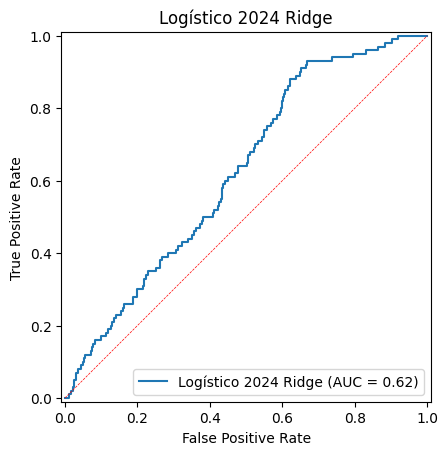

In [241]:
# Evaluación del modelo Logístico 2024 lasso
y_pred_log2024 = modelo_l2.predict(xtest2024)
y_pred_prob2024 = modelo_l2.predict_proba(xtest2024)[:, 1]
accuracy_log2024 = accuracy_score(ytest2024, y_pred_log2024)
conf_matrix_log2024 = confusion_matrix(ytest2024, y_pred_log2024)
fpr_log2024, tpr_log2024, _ = roc_curve(ytest2024, y_pred_prob2024)
roc_auc_log2024 = roc_auc_score(ytest2024, y_pred_prob2024)

print("Evaluación del modelo Logístico 2024 Ridge:")
print(f'Accuracy: {accuracy_log2024:.2f}')
print('Matriz de Confusión:')
print(conf_matrix_log2024)

display = RocCurveDisplay(fpr=fpr_log2024, tpr=tpr_log2024, roc_auc=roc_auc_log2024, estimator_name='Logístico 2024 Ridge')
display.plot()
plt.title('Logístico 2024 Ridge')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', linewidth=.5)
plt.show()

MODELOS DE 2004

In [242]:
# Regresión logística con L1 (LASSO)
modelo_l1_04 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
modelo_l1_04.fit(xtrain2004, ytrain2004)

# Regresión logística con L2 (Ridge)
modelo_l2_04 = LogisticRegression(penalty='l2', solver='liblinear', C=1.0)
modelo_l2_04.fit(xtrain2004, ytrain2004)

LogisticRegression(solver='liblinear')

Evaluación del modelo Logístico 2004 LASSO:
Accuracy: 0.95
Matriz de Confusión:
[[1988    0]
 [ 100    0]]


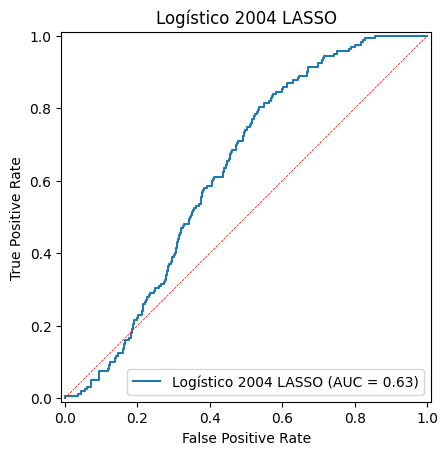

In [243]:
# Evaluación del modelo Logístico 2004 lasso
y_pred_log2004 = modelo_l1_04.predict(xtest2004)
y_pred_prob2004 = modelo_l1_04.predict_proba(xtest2004)[:, 1]
accuracy_log2004 = accuracy_score(ytest2004, y_pred_log2004)
conf_matrix_log2004 = confusion_matrix(ytest2004, y_pred_log2004)
fpr_log2004, tpr_log2004, _ = roc_curve(ytest2004, y_pred_prob2004)
roc_auc_log2004 = roc_auc_score(ytest2004, y_pred_prob2004)

print("Evaluación del modelo Logístico 2004 LASSO:")
print(f'Accuracy: {accuracy_log2024:.2f}')
print('Matriz de Confusión:')
print(conf_matrix_log2024)

display = RocCurveDisplay(fpr=fpr_log2004, tpr=tpr_log2004, roc_auc=roc_auc_log2004, estimator_name='Logístico 2004 LASSO')
display.plot()
plt.title('Logístico 2004 LASSO')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', linewidth=.5)
plt.show()

Evaluación del modelo Logístico 2004 Ridge:
Accuracy: 0.95
Matriz de Confusión:
[[1988    0]
 [ 100    0]]


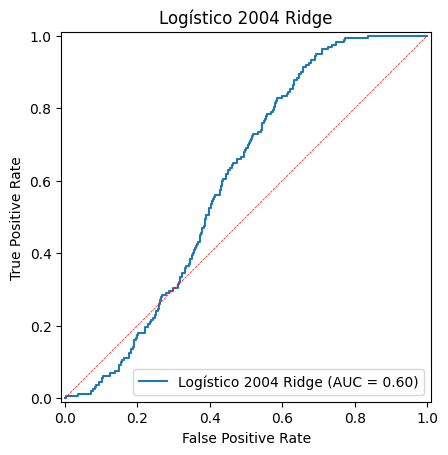

In [244]:
# Evaluación del modelo Logístico 2004 Ridge
y_pred_log2004 = modelo_l2_04.predict(xtest2004)
y_pred_prob2004 = modelo_l2_04.predict_proba(xtest2004)[:, 1]
accuracy_log2004 = accuracy_score(ytest2004, y_pred_log2004)
conf_matrix_log2004 = confusion_matrix(ytest2004, y_pred_log2004)
fpr_log2004, tpr_log2004, _ = roc_curve(ytest2004, y_pred_prob2004)
roc_auc_log2004 = roc_auc_score(ytest2004, y_pred_prob2004)

print("Evaluación del modelo Logístico 2004 Ridge:")
print(f'Accuracy: {accuracy_log2024:.2f}')
print('Matriz de Confusión:')
print(conf_matrix_log2024)

display = RocCurveDisplay(fpr=fpr_log2004, tpr=tpr_log2004, roc_auc=roc_auc_log2004, estimator_name='Logístico 2004 Ridge')
display.plot()
plt.title('Logístico 2004 Ridge')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', linewidth=.5)
plt.show()

5) Realicen un barrido en = 10n λ con n ∈ {−5, −4, −3 ..., +4, +5} y utilicen
10-fold CV para elegir el λ óptimo en regresión logística con Ridge y con
LASSO. ¿Qué λ seleccionó en cada caso? Usando la librería de seaborn,
generen box plot mostrando la distribución del error de predicción para
cada λ. Cada box debe corresponder a un valor de λ y contener como
observaciones el error medio de validación (MSE) para cada partición.
Además, para la regularización LASSO, generen un line plot del
promedio de la proporción de variables ignoradas por el modelo en
función de λ (como vieron en el tutorial 10), es decir la proporción de
variables para las cuales el coeficiente asociado es cero

In [245]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error

In [246]:
# Definir los valores de n
n_values = np.arange(-5, 6)  # Valores de n: -5, -4, ..., +5

# Generar los valores de λ como 10^n
lambdas = 10.0 ** n_values
print("Valores de λ:", lambdas)


Valores de λ: [1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04
 1.e+05]


In [247]:
# Invertir los valores de λ para obtener C
Cs = 1 / lambdas
Cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Modelos para Ridge (L2) y Lasso (L1)
model_ridge_2004 = LogisticRegressionCV(penalty='l2', solver='liblinear', Cs=Cs, cv=Cv, scoring='accuracy', max_iter=1000)
model_lasso_2004 = LogisticRegressionCV(penalty='l1', solver='liblinear', Cs=Cs, cv=Cv, scoring='accuracy', max_iter=1000)

model_ridge_2024 = LogisticRegressionCV(penalty='l2', solver='liblinear', Cs=Cs, cv=Cv, scoring='accuracy', max_iter=1000)
model_lasso_2024 = LogisticRegressionCV(penalty='l1', solver='liblinear', Cs=Cs, cv=Cv, scoring='accuracy', max_iter=1000)

In [248]:
modelol1_2024_CV=model_lasso_2024.fit(xtrain2024,ytrain2024)
modelol1_2004_CV=model_lasso_2004.fit(xtrain2004,ytrain2004)

modelol2_2024_CV=model_ridge_2024.fit(xtrain2024,ytrain2024)
modelol2_2004_CV=model_ridge_2004.fit(xtrain2004,ytrain2004)

In [249]:

# Mejor lambda para cada modelo 2024
bestlambdaridge2024 = modelol2_2024_CV.C_[0]
bestlambdalasso2024 = modelol1_2024_CV.C_[0]

print(f"Mejor lambda para Ridge 2024: {bestlambdaridge2024}")
print(f"Mejor lambda para Lasso 2024: {bestlambdalasso2024}")


Mejor lambda para Ridge 2024: 99999.99999999999
Mejor lambda para Lasso 2024: 99999.99999999999


In [250]:
# Mejor lambda para cada modelo
bestlambdaridge2004 = modelol2_2004_CV.C_[0]
bestlambdalasso2004 = modelol1_2004_CV.C_[0]

print(f"Mejor lambda para Ridge 2004: {bestlambdaridge2004}")
print(f"Mejor lambda para Lasso 2004: {bestlambdalasso2004}")

Mejor lambda para Ridge 2004: 100.0
Mejor lambda para Lasso 2004: 10.0


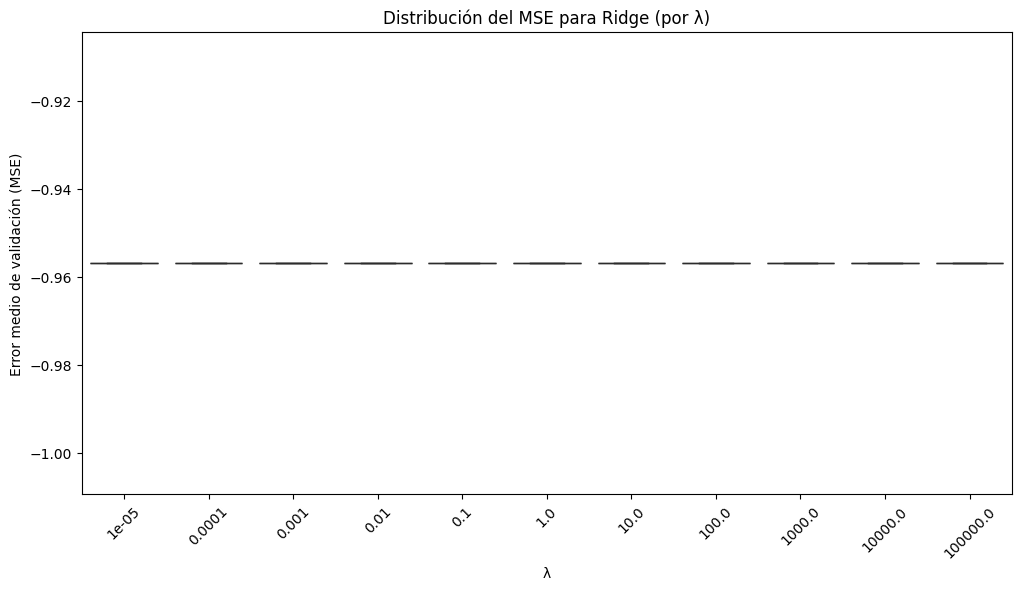

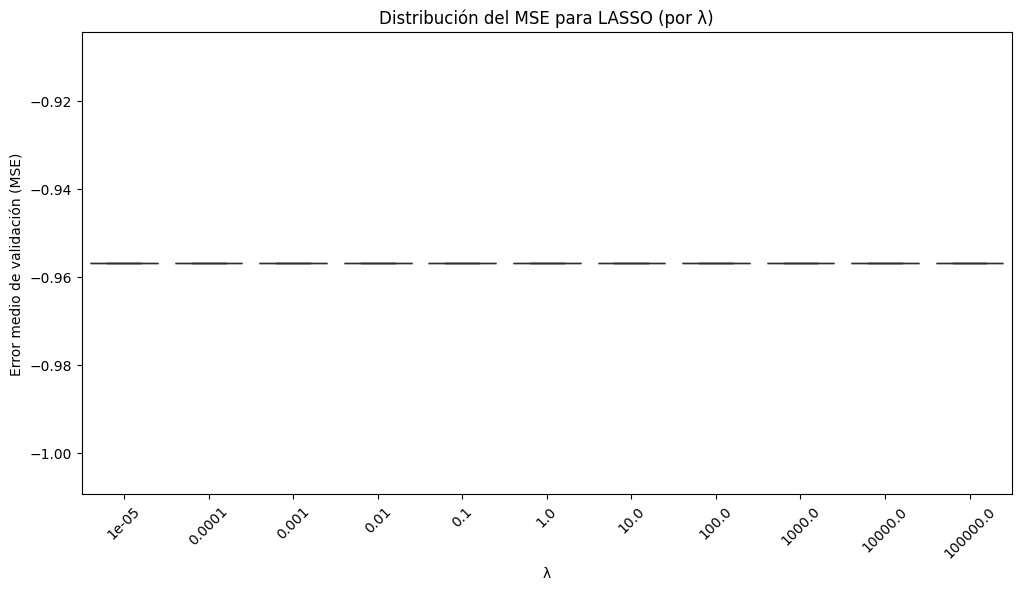

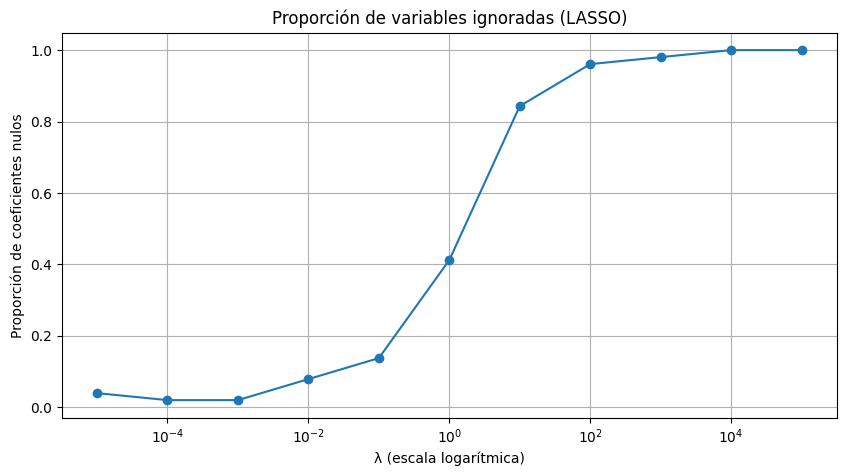

In [251]:

# Obtener errores de predicción (MSE) para cada λ
ridge_errors = -modelol2_2024_CV.scores_[1]  # Negativo porque usamos "neg_mean_squared_error"
lasso_errors = -modelol1_2024_CV.scores_[1]

# Crear DataFrame para el boxplot
ridge_df = pd.DataFrame(ridge_errors, columns=lambdas)
lasso_df = pd.DataFrame(lasso_errors, columns=lambdas)

# Para LASSO: Proporción de variables ignoradas por λ
proportion_ignored = []

for c in modelol1_2024_CV.Cs_:
    model = LogisticRegression(penalty='l1', solver='liblinear', C=c, max_iter=1000)
    model.fit(xtrain2024, ytrain2024)
    coef_zeros = np.sum(model.coef_ == 0) / model.coef_.size
    proportion_ignored.append(coef_zeros)

# Paso 4: Graficar resultados

# Boxplot para Ridge y LASSO
plt.figure(figsize=(12, 6))
sns.boxplot(data=ridge_df, palette="Blues", showfliers=False)
plt.title("Distribución del MSE para Ridge (por λ)")
plt.xlabel("λ")
plt.ylabel("Error medio de validación (MSE)")
plt.xticks(range(len(lambdas)), labels=lambdas, rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=lasso_df, palette="Oranges", showfliers=False)
plt.title("Distribución del MSE para LASSO (por λ)")
plt.xlabel("λ")
plt.ylabel("Error medio de validación (MSE)")
plt.xticks(range(len(lambdas)), labels=lambdas, rotation=45)
plt.show()

# Proporción de variables ignoradas para LASSO
plt.figure(figsize=(10, 5))
plt.plot(lambdas, proportion_ignored, marker='o')
plt.xscale('log')
plt.title("Proporción de variables ignoradas (LASSO)")
plt.xlabel("λ (escala logarítmica)")
plt.ylabel("Proporción de coeficientes nulos")
plt.grid()
plt.show()

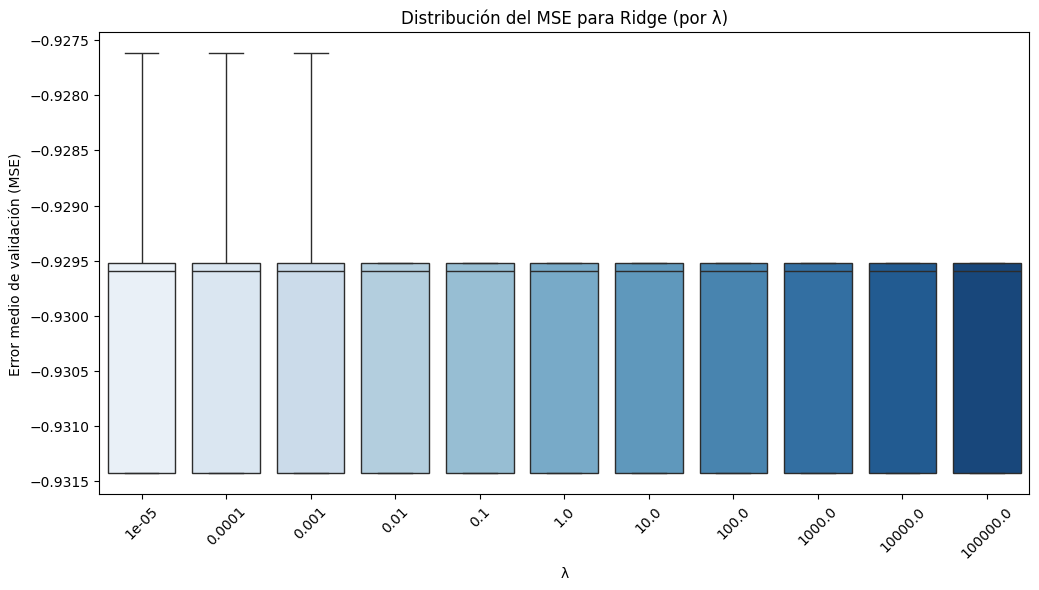

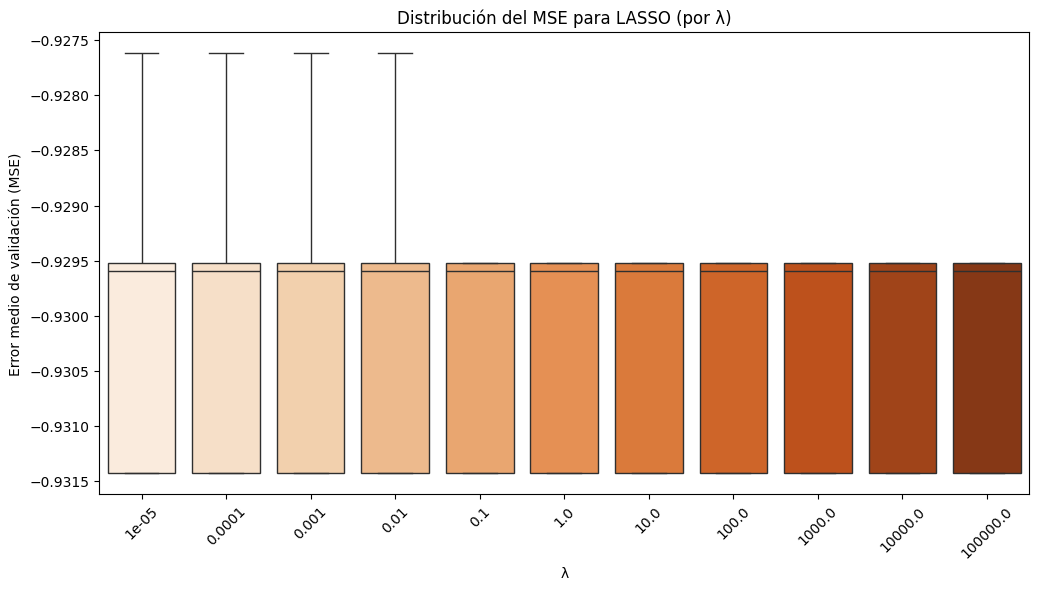

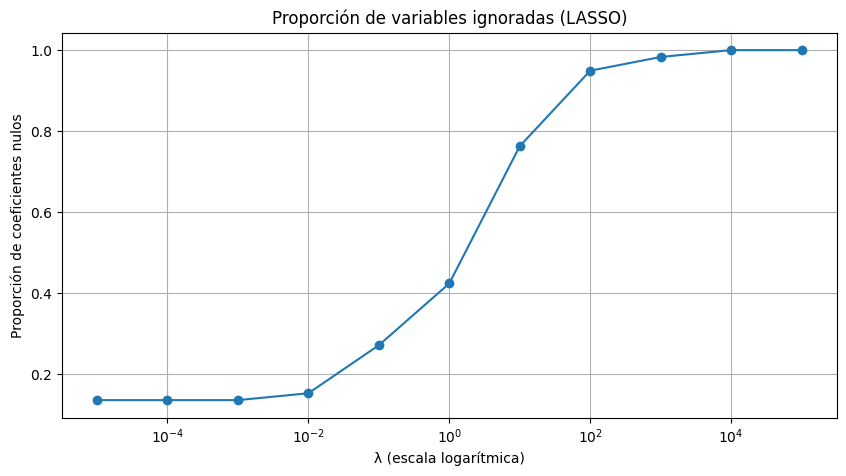

In [252]:

# Obtener errores de predicción (MSE) para cada λ
ridge_errors = -modelol2_2004_CV.scores_[1]  # Negativo porque usamos "neg_mean_squared_error"
lasso_errors = -modelol1_2004_CV.scores_[1]

# Crear DataFrame para el boxplot
ridge_df = pd.DataFrame(ridge_errors, columns=lambdas)
lasso_df = pd.DataFrame(lasso_errors, columns=lambdas)

# Para LASSO: Proporción de variables ignoradas por λ
proportion_ignored = []

for c in modelol1_2004_CV.Cs_:
    model = LogisticRegression(penalty='l1', solver='liblinear', C=c, max_iter=1000)
    model.fit(xtrain2004, ytrain2004)
    coef_zeros = np.sum(model.coef_ == 0) / model.coef_.size
    proportion_ignored.append(coef_zeros)

# Paso 4: Graficar resultados

# Boxplot para Ridge y LASSO
plt.figure(figsize=(12, 6))
sns.boxplot(data=ridge_df, palette="Blues", showfliers=False)
plt.title("Distribución del MSE para Ridge (por λ)")
plt.xlabel("λ")
plt.ylabel("Error medio de validación (MSE)")
plt.xticks(range(len(lambdas)), labels=lambdas, rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=lasso_df, palette="Oranges", showfliers=False)
plt.title("Distribución del MSE para LASSO (por λ)")
plt.xlabel("λ")
plt.ylabel("Error medio de validación (MSE)")
plt.xticks(range(len(lambdas)), labels=lambdas, rotation=45)
plt.show()

# Proporción de variables ignoradas para LASSO
plt.figure(figsize=(10, 5))
plt.plot(lambdas, proportion_ignored, marker='o')
plt.xscale('log')
plt.title("Proporción de variables ignoradas (LASSO)")
plt.xlabel("λ (escala logarítmica)")
plt.ylabel("Proporción de coeficientes nulos")
plt.grid()
plt.show()

En el caso del valor óptimo de λ para LASSO encontrado en el inciso
anterior, ¿qué variables fueron descartadas? ¿Son las que hubieran
esperado? ¿Tiene relación con lo que respondieron en el inciso 1 de la
Parte I?

In [253]:
# Ver las nuevas columnas generadas por el modelo
coef_flat = modelol1_2024_CV.coef_.flatten()

# Crear un DataFrame con las columnas de entrada y sus coeficientes
coefficients = pd.DataFrame({
    'Variable': x2024.columns,  # Las columnas después de dummies
    'Coeficiente': coef_flat
})

# Mostrar las columnas con coeficientes no cero
coefficients_non_zero = coefficients[coefficients['Coeficiente'] != 0]
print(coefficients_non_zero)


               Variable  Coeficiente
0                  CH06    -0.310125
1                IX_TOT    -0.082037
2   EDAD_PROMEDIO_HOGAR     0.096503
3    PROP_EDUC_SUPERIOR    -0.224143
4          TIENE_PAREJA    -4.587449
5                  Unos    -4.600849
6                CH04_2    -0.073785
7                CH07_2     0.113295
8                CH07_3    -3.987276
9                CH07_4    -5.515378
10               CH07_5    -4.215328
11               CH08_2     0.756265
12               CH08_3    -8.611856
13               CH08_4     1.676860
14               CH08_9   -10.112275
15              CH08_12     0.869118
16              CH08_13    -7.860809
18           NIVEL_ED_2     4.204325
19           NIVEL_ED_3     3.375701
20           NIVEL_ED_4     4.514808
21           NIVEL_ED_5     4.902924
22           NIVEL_ED_6     4.322018
23           NIVEL_ED_7   -10.706072
24                IV1_2    -0.072163
25                IV1_3     1.861529
26                IV1_4     0.995861
2

In [254]:
#Variables descartadas de 2024
discarded_variables = coefficients[coefficients['Coeficiente'] == 0]
print(discarded_variables)


   Variable  Coeficiente
17  CH08_23          0.0


In [255]:
# Ver las nuevas columnas generadas por el modelo
coef_flat = modelol1_2004_CV.coef_.flatten()

# Crear un DataFrame con las columnas de entrada y sus coeficientes
coefficients = pd.DataFrame({
    'Variable': x2004.columns,  # Las columnas después de dummies
    'Coeficiente': coef_flat
})

# Mostrar las columnas con coeficientes no cero
coefficients_non_zero = coefficients[coefficients['Coeficiente'] != 0]
print(coefficients_non_zero)


                                             Variable  Coeficiente
0                                                CH06     0.074541
1                                              IX_TOT    -0.035786
2                                 EDAD_PROMEDIO_HOGAR     0.084328
3                                  PROP_EDUC_SUPERIOR    -0.120211
4                                        TIENE_PAREJA    -0.271805
5                                                Unos    -0.387255
6                                          CH04_Mujer     0.085476
7                                         CH07_Casado    -0.052733
9                                          CH07_Viudo    -0.337061
10                                       CH07_Soltero     0.157437
12         CH08_Mutual/Prepaga/Servicio de emergencia     0.465559
13                     CH08_Planes y seguros públicos     1.343948
14                      CH08_No paga ni le descuentan     1.253812
15                                       CH08_Ns./Nr.    -1.79

In [256]:
#Variables descartadas de 2004
discarded_variables = coefficients[coefficients['Coeficiente'] == 0]
print(discarded_variables)


                                             Variable  Coeficiente
8                          CH07_Separado o divorciado          0.0
11                                       CH07_Ns./Nr.          0.0
17       CH08_Obra social y planes y seguros públicos          0.0
18  CH08_Mutual/prepaga/servicio de emergencia/pla...          0.0
19  CH08_Obra social, mutual/prepaga/servicio de e...          0.0
29            IV1_Local no construido para habitación          0.0
36   IV6_Fuera de la vivienda pero dentro del terreno          0.0
48                                              V8_No          0.0
49                                         V8_Ns./Nr.          0.0
50                                              V9_Sí          0.0
51                                              V9_No          0.0
52                                         V9_Ns./Nr.          0.0
54                                             V10_No          0.0
55                                        V10_Ns./Nr.         

Elijan alguno de los modelos de regresión logística donde hayan probado
distintos parámetros de regularización y comenten: Compare los
resultados de 2004 versus 2024, ¿qué método de regularización funcionó
mejor: Ridge o LASSO? ¿LASSO hizo una selección distinta de
predictores en 2004 versus 2024? Comenten mencionando el error
cuadrático medio (MSE).


In [ ]:
y_prob_lasso_2004 = modelol1_2004_CV.predict_proba(xtest2004)[:, 1]
y_prob_lasso_2024 = modelol1_2024_CV.predict_proba(xtest2024)[:, 1]
y_prob_ridge_2004 = modelol2_2004_CV.predict_proba(xtest2004)[:, 1]
y_prob_ridge_2024 = modelol2_2024_CV.predict_proba(xtest2024)[:, 1]

mse_lasso_2004 = mean_squared_error(ytest2004, y_prob_lasso_2004)
mse_lasso_2024 = mean_squared_error(ytest2024, y_prob_lasso_2024)
mse_ridge_2004 = mean_squared_error(ytest2004, y_prob_ridge_2004)
mse_ridge_2024 = mean_squared_error(ytest2024, y_prob_ridge_2024)

print(f"MSE Lasso 2004: {mse_lasso_2004}")
print(f"MSE Ridge 2004: {mse_ridge_2004}")
print(f"MSE Lasso 2024: {mse_lasso_2024}")
print(f"MSE Ridge 2024: {mse_ridge_2024}")
#En ambos casos el mejor modelo de 2004 es el Ridge mientras que en el de 2024 ambos modelos son igual de buienos. Las variables elegidas también fueron deiferentes ya que se descartaron mas variables en el modelo de 2024 que en el de 2004 

MSE Lasso 2004: 0.20955125422807022
MSE Ridge 2004: 0.2708460827177531
MSE Lasso 2024: 0.051140919264623816
MSE Ridge 2024: 0.051345490389607625
